In [15]:
import numpy as np
import matplotlib.pyplot as plt

#y = 4x + 3 + noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 0.2 * X + 4.3 + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]

# Mean Squared Error Loss
def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    return (1 / (2 * m)) * np.sum(error ** 2)

def compute_gradient(X, y, theta):
    m = len(y)
    return (1 / m) * X.T.dot(X.dot(theta) - y)

# Batch Gradient Descent
def batch_gradient_descent(X, y, lr=0.1, n_iters=100):
    theta = np.random.randn(2, 1)
    loss_history = []
    theta_history = []
    for _ in range(n_iters):
        gradients = compute_gradient(X, y, theta)
        theta -= lr * gradients
        loss_history.append(compute_loss(X, y, theta))
        theta_history.append(theta.copy())
    return theta, loss_history, theta_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.1, n_epochs=50):
    m = len(y)
    theta = np.random.randn(2, 1)
    loss_history = []
    theta_history = []
    for _ in range(n_epochs):
        for i in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
            loss_history.append(compute_loss(X, y, theta))
            theta_history.append(theta.copy())
    return theta, loss_history, theta_history

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, lr=0.1, n_epochs=50, batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)
    loss_history = []
    theta_history = []
    for _ in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (2 / batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
            loss_history.append(compute_loss(X, y, theta))
            theta_history.append(theta.copy())
    return theta, loss_history, theta_history

theta_batch, loss_batch, history_batch = batch_gradient_descent(X_b, y)
theta_sgd, loss_sgd, history_sgd = stochastic_gradient_descent(X_b, y)
theta_mini, loss_mini, history_mini = mini_batch_gradient_descent(X_b, y)



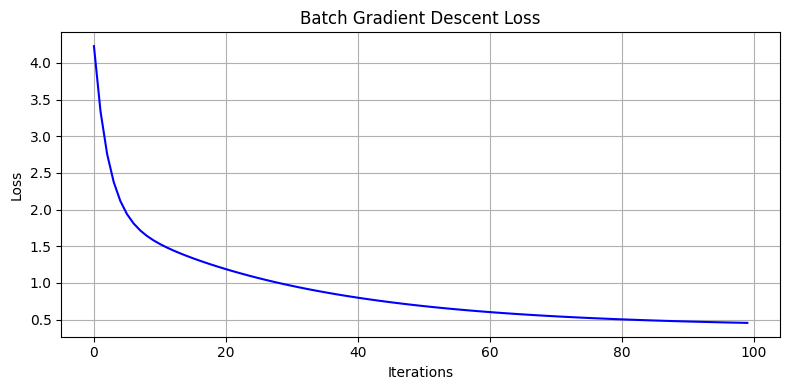

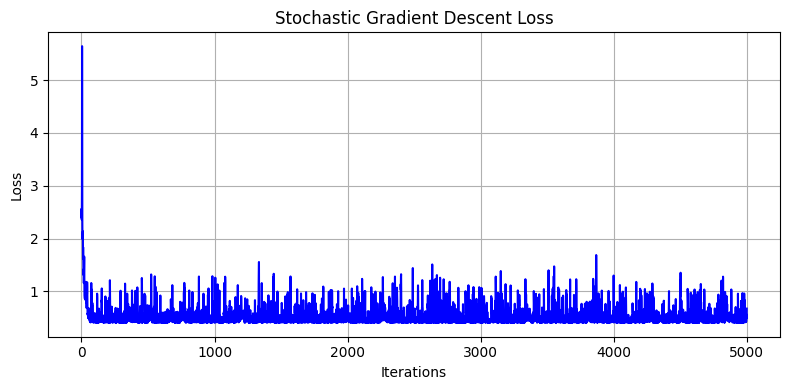

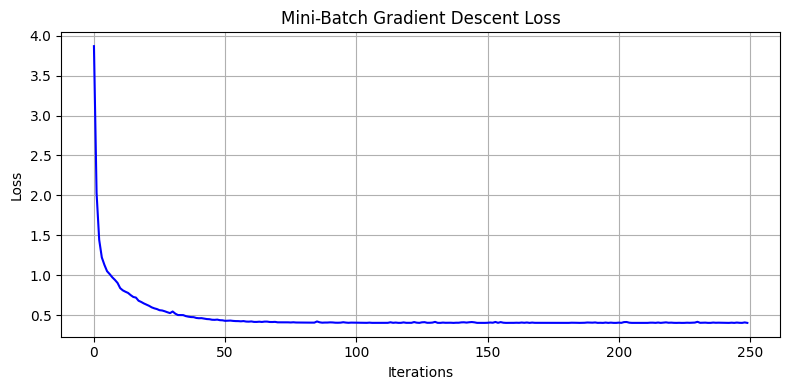

In [17]:
def plot_loss(loss, title):
    plt.figure(figsize=(8, 4))
    plt.plot(loss, color='blue')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_loss(loss_batch, "Batch Gradient Descent Loss")
plot_loss(loss_sgd, "Stochastic Gradient Descent Loss")
plot_loss(loss_mini, "Mini-Batch Gradient Descent Loss")